# GEOtiled Crop Optimization Notebook

<p style="text-align:center">
    <img src="images/crop_optimization.png" width="700"/>
</p>
<p style="text-align:center">
    <b>Figure 1. </b>Crop Optimization
</p>

This notebook showcases the execution time improvements made by parallelizing the crop functionality of GEOtiled.

## Preconfiguration

Import the needed libraries to run the code blocks.

In [1]:
import crop_functions as cp
import geotiled
import time

Modify the testing parameters below to change the data and size of tiles created. 

Do not specify tile sizes that would cause the final file count to exceed the number of cores available for the best performance results.

In [3]:
# The working directory to store files in
working_directory = '/media/volume/geotiled-saga/crop_test'
geotiled.set_working_directory(working_directory)

# Size of tiles to produce specified as a list of [x,y] values (units of pixels)
tile_sizes = [[18274,16862],[18274,8431],[9137,8431],[9137,4216],[4569,4216]]

# Data to download
resolution = '30m'
region = 'TN'

# Number of runs to do (execution times for each tile size will be averaged at the end)
runs = 10

Create a CSV to store the results to.

In [27]:
file = open('results.csv', 'w')
file.write('method,tile_size,run_number,execution_time\n')
file.close()

## Initialization

Download the preprocess the data that will be cropped.

In [ ]:
# Download the desired data
geotiled.fetch_dems(shapefile=region, dataset=resolution, save_to_txt=False, download=True)

# Mosaic DEMs
geotiled.mosaic_rasters(input_folder='dem_tiles', output_file='mosaic.tif', description='Elevation')

# Reproject mosaic into computable format
geotiled.reproject(input_file='mosaic.tif', output_file='elevation.tif', projection='EPSG:26918')

Downloading: 100%|█████████████████████████████████████████████| 58.1M/58.1M [00:02<00:00, 28.6MB/s]
Downloading: 100%|█████████████████████████████████████████████| 1.72G/1.72G [00:27<00:00, 63.6MB/s]


## Sequential Crop

Crop the file into the desired tile sizes sequentially and record the time it takes to do so.

In [29]:
for ts in tile_sizes:
    for i in range(runs):
        # Perform crop
        start_time = time.time()
        cp.sequential_crop('elevation.tif', 'sequential_tiles', ts[0], ts[1])
        run_time = time.time() - start_time

        # Update CSV
        file = open('results.csv', 'a')
        file.write(f"sequential,{ts[0]}x{ts[1]},{i},{run_time}\n")
        file.close()

## Parallel Crop

Crop the file into the desired tile sizes in parallel and record the time it takes to do so.

In [30]:
for ts in tile_sizes:
    for i in range(runs):
        # Perform crop
        start_time = time.time()
        cp.parallel_crop('elevation.tif', 'parallel_tiles', ts[0], ts[1])
        run_time = time.time() - start_time

        # Update CSV
        file = open('results.csv', 'a')
        file.write(f"parallel,{ts[0]}x{ts[1]},{i},{run_time}\n")
        file.close()

## Visualize Results

Plot execution time of both sequential and parallel cropping.

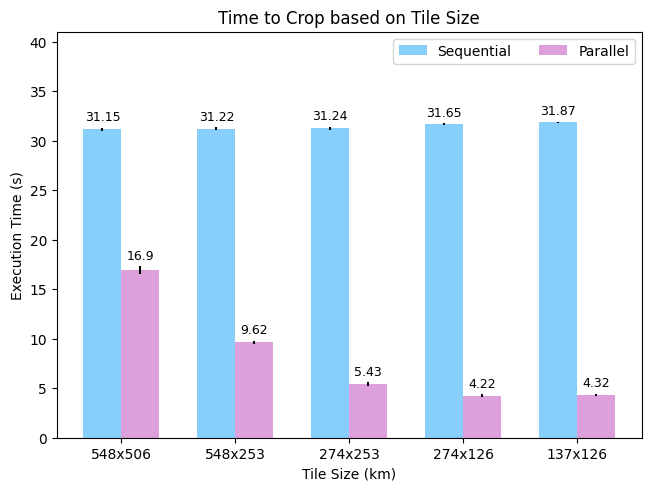

In [4]:
cp.plot_crop_results('results.csv')

### End of Notebook